In [2]:
import numpy as np
import cv2
from pylab import imread
from skimage.color import rgb2gray
from matplotlib import pyplot as plt 
from scipy.linalg import svd
from scipy.linalg import toeplitz
import pandas as pd

c:\Users\PC\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


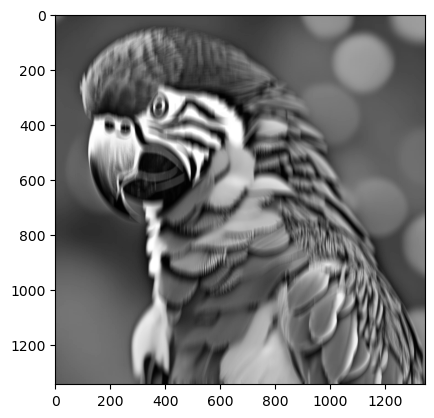

In [3]:
# đọc ảnh
image=imread('parrot_vertical_gray _official.jpg')
plt.imshow(image, cmap='gray')

In [4]:
# biến hình ảnh thành dạng mảng
B = np.array(image)

In [5]:
# Tạo ma trận Toeplitz
def create_toeplitz(matrix, l):
    padding = np.zeros(matrix.shape[1]-1, matrix.dtype)
    first_col = np.r_[matrix[0, 0], padding]
    first_row = np.r_[matrix[0,0:l], padding]
    toeplitz_matrix = toeplitz(first_col, first_row).astype('float64')
    # Tạo ma trận giảm cấp m x n từ l :
    for i in range(toeplitz_matrix.shape[0]):
        for j in range(toeplitz_matrix.shape[1]):
            if toeplitz_matrix[i, j] != 0:
                toeplitz_matrix[i, j] = 1/l
    return toeplitz_matrix

A = create_toeplitz(B, 30)
print("toeplitz matrix is:\n", A)
                
print(A.shape)


toeplitz matrix is:
 [[0.03333333 0.03333333 0.03333333 ... 0.         0.         0.        ]
 [0.         0.03333333 0.03333333 ... 0.         0.         0.        ]
 [0.         0.         0.03333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03333333 0.         0.        ]
 [0.         0.         0.         ... 0.03333333 0.03333333 0.        ]
 [0.         0.         0.         ... 0.03333333 0.03333333 0.03333333]]
(1344, 1373)


In [6]:
# Tìm SVD
m, n = A.shape
U, S_diag, V_T = svd(A)
# Tìm ma trận Sigma_+
k = len(S_diag)
Sigma = np.zeros((k, k))
np.fill_diagonal(Sigma, S_diag)

if m > k:
    Sigma = np.pad(Sigma, pad_width = ((0, m-k), (0, 0)), mode='constant', constant_values=0)
if n > k:
    Sigma = np.pad(Sigma, pad_width = ((0, 0), (0, n-k)), mode='constant', constant_values=0)

# Tính A_pinv
Sigma_pinv = np.linalg.pinv(Sigma)
V = V_T.T
U_T = U.T
A_pinv = np.dot(V, np.dot(Sigma_pinv, U_T))
# Tính X_pinv
X_pinv = np.dot(A_pinv, B)


print("Ma trận Sigma_+ là:\n", Sigma_pinv)
print("Ma trận của ảnh sau khi khôi phục là:\n", X_pinv)



Ma trận Sigma_+ là:
 [[1.0002006  0.         0.         ... 0.         0.         0.        ]
 [0.         1.00080274 0.         ... 0.         0.         0.        ]
 [0.         0.         1.00180744 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Ma trận của ảnh sau khi khôi phục là:
 [[111.21079107 111.21079107 111.21079107 ... 208.10499503 187.60501105
  215.29332607]
 [ 71.42818237  71.42818237  71.42818237 ... 115.49629938 118.47457627
  105.07593477]
 [ 64.25426933  64.25426933  93.60209542 ... 162.45282112 197.38761975
  192.46723911]
 ...
 [129.47166063 129.47166063 129.47166063 ... 127.23542982 105.43109801
  148.11941303]
 [101.42818237 101.42818237 101.42818237 ...  51.5832559  100.21370671
   75.72810868]
 [ 94.25426933  94.25426933  94.25426933 ... 118.7571689

Text(0.5, 1.0, 'Ảnh nhòe theo phương thẳng đứng')

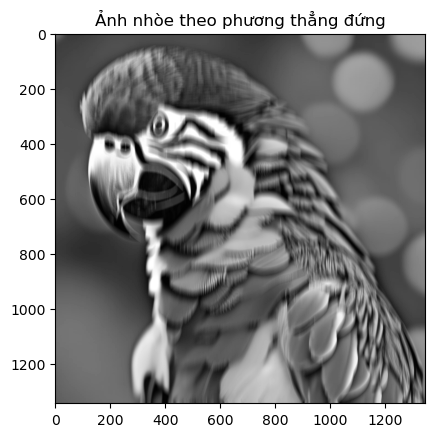

In [8]:
# In ra ảnh nhòe
plt.imshow(image, cmap='gray')
plt.title('Ảnh nhòe theo phương thẳng đứng')

Text(0.5, 1.0, 'Ảnh sau khi khôi phục')

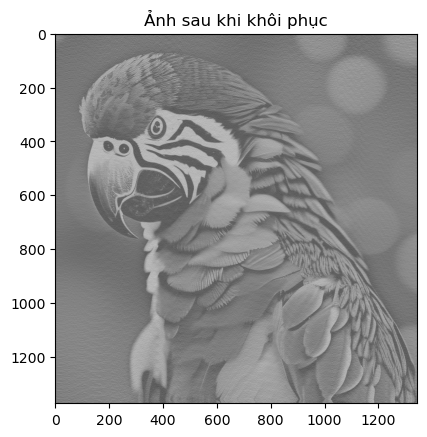

In [9]:
# In ra ảnh sau khi khôi phục
plt.imshow(X_pinv, cmap='gray')
plt.title('Ảnh sau khi khôi phục')